In [24]:
# Loading required libraries and functions
import os
import shutil
import random
import itertools
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib as mpl
from keras import backend
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import decode_predictions, preprocess_input

In [25]:
# Loading data and preprocessing images according to mobilenet requirements
# Creating batches of data

labels = ['Flooding', 'No Flooding']
train_path = 'data/train'
valid_path = 'data/valid'
test_path = 'data/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 321 images belonging to 2 classes.
Found 81 images belonging to 2 classes.
Found 71 images belonging to 2 classes.


In [26]:
#Loading pre-trained lightweight mobilenet image classifier
mobile = tf.keras.applications.mobilenet.MobileNet(weights='imagenet', include_top=False)


In [27]:
# Store all layers of the original mobilenet except the last 5 layers in variable x
# There is no predefined logic behind this, it just gives the optimal results for this task
# Also, we will be only training the last 12 layers of the mobilenet during finetuning as we want 
# it to keep all of the previously learned weights 
x = mobile.layers[-12].output
x


<KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'conv_dw_12')>

In [28]:
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
output = Dense(units=2, activation='sigmoid')(x)

In [29]:
# Construct the new fine-tuned mode
model = Model(inputs=mobile.input, outputs=output)

In [30]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, None, None, 512)  2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, None, None, 512)  4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, None, None, 512)  2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_pw_9 (Conv2D)          (None, None, None, 512)   262144    
                                                                 
 conv_pw_9

In [32]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\joshi\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [33]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10


C:\Users\joshi\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


33/33 - 32s - loss: 1.1895 - accuracy: 0.6106 - val_loss: 0.7549 - val_accuracy: 0.6420 - 32s/epoch - 961ms/step
Epoch 2/10
33/33 - 29s - loss: 0.4316 - accuracy: 0.8411 - val_loss: 0.3917 - val_accuracy: 0.8519 - 29s/epoch - 891ms/step
Epoch 3/10
33/33 - 32s - loss: 0.3550 - accuracy: 0.8660 - val_loss: 0.2616 - val_accuracy: 0.8765 - 32s/epoch - 964ms/step
Epoch 4/10
33/33 - 33s - loss: 0.2038 - accuracy: 0.9315 - val_loss: 0.1435 - val_accuracy: 0.9383 - 33s/epoch - 1s/step
Epoch 5/10
33/33 - 35s - loss: 0.2449 - accuracy: 0.9159 - val_loss: 0.1419 - val_accuracy: 0.9259 - 35s/epoch - 1s/step
Epoch 6/10
33/33 - 33s - loss: 0.2140 - accuracy: 0.9252 - val_loss: 0.1810 - val_accuracy: 0.9012 - 33s/epoch - 995ms/step
Epoch 7/10
33/33 - 34s - loss: 0.1022 - accuracy: 0.9564 - val_loss: 0.1209 - val_accuracy: 0.9383 - 34s/epoch - 1s/step
Epoch 8/10
33/33 - 34s - loss: 0.0604 - accuracy: 0.9844 - val_loss: 0.1046 - val_accuracy: 0.9506 - 34s/epoch - 1s/step
Epoch 9/10
33/33 - 37s - loss: 

In [20]:
#model.save("model_flood.h5")
model.load_weights('model_flood.h5')

In [21]:
# Make predictions and plot confusion matrix to look how well our model performed in classifying 
# flooding and no flooding images 

test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
precision = precision_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
accuracy = accuracy_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Precision:  0.9655172413793104
Accuracy:  0.9859154929577465


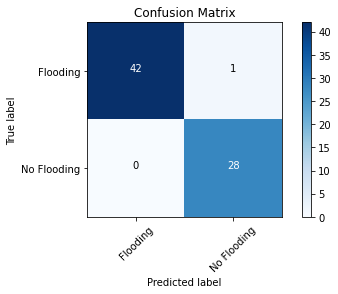

In [22]:
# Pring precision, F1 score and accuracy of our model
print('Precision: ', precision)
print('Accuracy: ', accuracy)
# Confusion Matrix 
test_batches.class_indices
cm_plot_labels = ['Flooding','No Flooding']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [23]:
#Prepare image for mobilenet prediction

def preprocess_image(file):
    img = image.load_img(file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)
# Display image which we want to predict
from IPython.display import Image
Image(filename='data/image_7.jpg', width=300,height=200) 
# Preprocess image and make prediction

preprocessed_image = preprocess_image('data/image_7.jpg')
predictions = model.predict(preprocessed_image)
# Print predicted accuracy scores for both classes, i.e. (1) Flooding, (2) No Flooding
predictions
# Get the maximum probability score for predicted class from predictions array
result = np.argmax(predictions)

1/1 [==============================] - 0s 57ms/step


In [19]:
labels[result]

'Flooding'